<a href="https://colab.research.google.com/github/Ni7070/Perceptron/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train-perceptron.txt to train-perceptron.txt


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading Train and Test data files
import numpy as np
df_train = np.loadtxt("train-perceptron.txt",dtype= float, delimiter = " ")

In [ ]:
#Distributing train data into trainClass1 and trainClass2 based on the data of the last column

df1 = df_train[np.where(df_train[:,-1]==1)]
w1 =  df1[:, [0,1]]

df2 = df_train[np.where(df_train[:,-1]==2)]

w2 =  df2[:, [0,1]]

df = np.concatenate((w1, w2), axis=0)

print('çlass1=  \n',w1)
print('çlass2=  \n',w2)
print('çlass2=  \n',df)

çlass1=  
 [[ 1.  1.]
 [ 1. -1.]
 [ 4.  5.]]
çlass2=  
 [[2.  2.5]
 [0.  2. ]
 [2.  3. ]]
çlass2=  
 [[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [ 2.   2.5]
 [ 0.   2. ]
 [ 2.   3. ]]


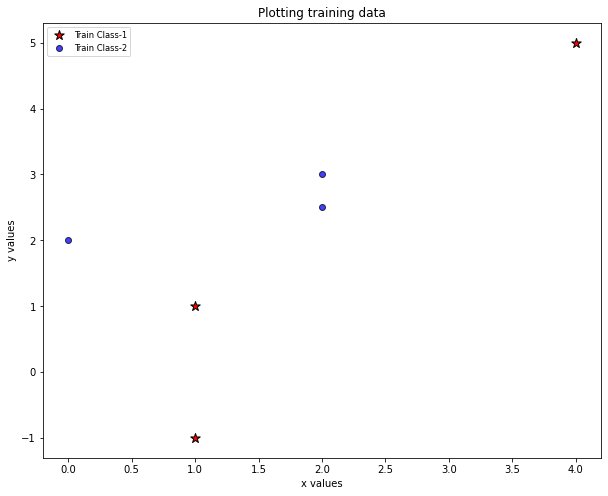

In [ ]:
#Plotting train data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize = (10, 8))
 
 
plt.scatter(w1[:,0], w1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black')
plt.scatter(w2[:,0], w2[:,1], c = 'blue', label='Train Class-2', edgecolors='black', alpha=0.75)
 
plt.title("Plotting training data")
ax.legend(frameon=True, shadow=True, borderpad=1)
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend(loc="best",fontsize="small") 
 
plt.show()

In [ ]:
y= np.empty(shape=[0, 6])

#multyplyting trainclass1 with given formula to acheive higher dimention
for i in range(0,df_train.shape[0]):
    m = np.array([[df[i, 0] * df[i, 0], df[i, 1] * df[i, 1], df[i, 0] * df[i, 1], df[i, 0], df[i, 1], 1]]);
    y = np.append(y, m, axis=0)

print(y)

#Normalization of the second class
y=np.concatenate((y[0:np.shape(w1)[0],:],-1*y[np.shape(w1)[0]:,:]),axis=0)
print(y)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [ 4.    6.25  5.    2.    2.5   1.  ]
 [ 0.    4.    0.    0.    2.    1.  ]
 [ 4.    9.    6.    2.    3.    1.  ]]
[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [ ]:
weight_0 = np.array([[0,0,0,0,0,0]])
 
weight_1 = np.array([[1,1,1,1,1,1]])
weight_rand = np.round([10*np.array(np.random.rand(6))])
print(weight_0, weight_1, weight_rand)
np.random.seed(0) ;
# weight3 = np.random.rand(6)
# print(weight3)
alpha=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


[[0 0 0 0 0 0]] [[1 1 1 1 1 1]] [[5. 7. 6. 5. 4. 6.]]


In [ ]:
#Batch update with initial weight 0
c = 0
batch_0_iter = []
for i in alpha:
  a = np.array(weight_0)
  c = 0
  while True:
    weight_update = []
    tmp = []
    b = 0
    for j in y:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          tmp.append(j)
          b = 1
    c = c + 1
    if b == 0:
      break            
    e = np.array(tmp)
    weight_update.append(np.sum(e, axis = 0))
    weight_update = np.array(weight_update)
    weight_update = a + (weight_update * i)
    a = weight_update
  batch_0_iter.append(c)  


In [ ]:
#Single update with initial weight 0
c = 0
single_0_iter = []
for i in alpha:
  a = np.array(weight_0)
  c = 0
  while True:
    b = 0
    for j in y:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          a = a + (j * i)
          b = 1
    c = c + 1
    if b == 0:
      break            
    
  single_0_iter.append(c) 

In [ ]:
print("Case 1:Initial Weight Vector All Zeros")
dataset1 = pd.DataFrame({'Alpha': alpha, 'Single Update': single_0_iter,'Batch Update':batch_0_iter})
print(dataset1.to_string(index=False))

Case 1:Initial Weight Vector All Zeros
 Alpha  Single Update  Batch Update
   0.1             94           105
   0.2             94           105
   0.3             94           105
   0.4             94           105
   0.5             94            92
   0.6             94           105
   0.7             94            92
   0.8             94           105
   0.9             94           105
   1.0             94            92


<Figure size 432x288 with 0 Axes>

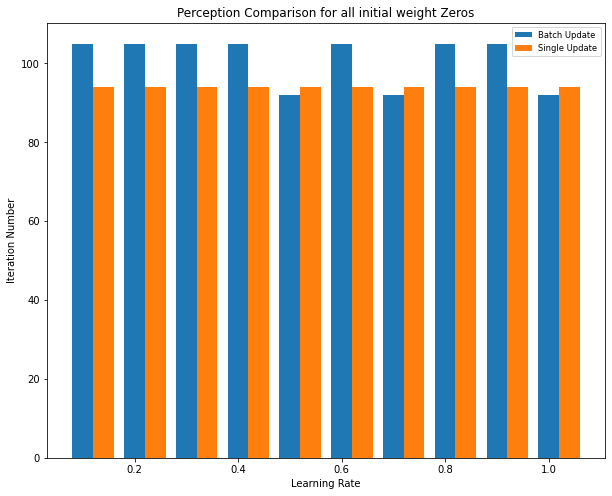

In [ ]:
plt.figure(1)
fig, ax = plt.subplots(1, figsize = (10, 8))

plt.bar(alpha, batch_0_iter, 0.04, label='Batch Update')
plt.bar(alpha+0.04, single_0_iter, 0.04, label='Single Update')

plt.title('Perception Comparison for all initial weight Zeros')
plt.xlabel("Learning Rate")
plt.ylabel("Iteration Number")
plt.legend(loc="best",fontsize="small")

In [ ]:
#Batch update with initial weight 1
c = 0
batch_1_iter = []
for i in alpha:
  a = np.array(weight_1)
  c = 0
  while True:
    weight_update = []
    tmp = []
    b = 0
    for j in y:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          tmp.append(j)
          b = 1
    c = c + 1
    if b == 0:
      break            
    e = np.array(tmp)
    weight_update.append(np.sum(e, axis = 0))
    weight_update = np.array(weight_update)
    weight_update = a + (weight_update * i)
    a = weight_update
  batch_1_iter.append(c) 

In [ ]:
#Single update with initial weight 1
c = 0
single_1_iter = []
for i in alpha:
  a = np.array(weight_1)
  c = 0
  while True:
    b = 0
    for j in y:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          a = a + (j * i)
          b = 1
    c = c + 1
    if b == 0:
      break            
    
  single_1_iter.append(c) 

In [ ]:
print("Case 2:Initial Weight Vector All Ones")
dataset1 = pd.DataFrame({'Alpha': alpha, 'Single Update': single_1_iter,'Batch Update':batch_1_iter})
print(dataset1.to_string(index=False))

Case 2:Initial Weight Vector All Ones
 Alpha  Single Update  Batch Update
   0.1              6           102
   0.2             92           104
   0.3            104            91
   0.4            106           116
   0.5             93           105
   0.6             93           114
   0.7            108            91
   0.8            115            91
   0.9             94           105
   1.0             94            93


<Figure size 432x288 with 0 Axes>

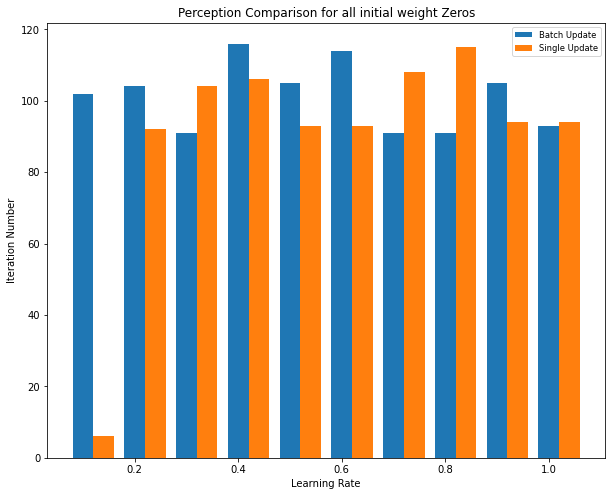

In [ ]:
plt.figure(2)
fig, ax = plt.subplots(1, figsize = (10, 8))

plt.bar(alpha, batch_1_iter, 0.04, label='Batch Update')
plt.bar(alpha+0.04, single_1_iter, 0.04, label='Single Update')

plt.title('Perception Comparison for all initial weight Zeros')
plt.xlabel("Learning Rate")
plt.ylabel("Iteration Number")
plt.legend(loc="best",fontsize="small")

In [ ]:
#Batch update with initial weight all random values 
c = 0
batch_rand_iter = []
for i in alpha:
  a = np.array(weight_rand)
  c = 0
  while True:
    weight_update = []
    tmp = []
    b = 0
    for j in y:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          tmp.append(j)
          b = 1
    c = c + 1
    if b == 0:
      break            
    e = np.array(tmp)
    weight_update.append(np.sum(e, axis = 0))
    weight_update = np.array(weight_update)
    weight_update = a + (weight_update * i)
    a = weight_update
  batch_rand_iter.append(c) 

In [ ]:
#Single update with initial random values
c = 0
single_rand_iter = []
for i in alpha:
  a = np.array(weight_rand)
  c = 0
  while True:
    b = 0
    for j in y:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          a = a + (j * i)
          b = 1
    c = c + 1
    if b == 0:
      break            
    
  single_rand_iter.append(c) 

In [ ]:
print("Case 3:Initial Weight Vector All Ones")
dataset1 = pd.DataFrame({'Alpha': alpha, 'Single Update': single_rand_iter,'Batch Update':batch_rand_iter})
print(dataset1.to_string(index=False))

Case 3:Initial Weight Vector All Ones
 Alpha  Single Update  Batch Update
   0.1             33            44
   0.2             14            85
   0.3             81            86
   0.4              7           135
   0.5             90           120
   0.6             93             7
   0.7             94           101
   0.8             89           103
   0.9             91           105
   1.0            105            97


<Figure size 432x288 with 0 Axes>

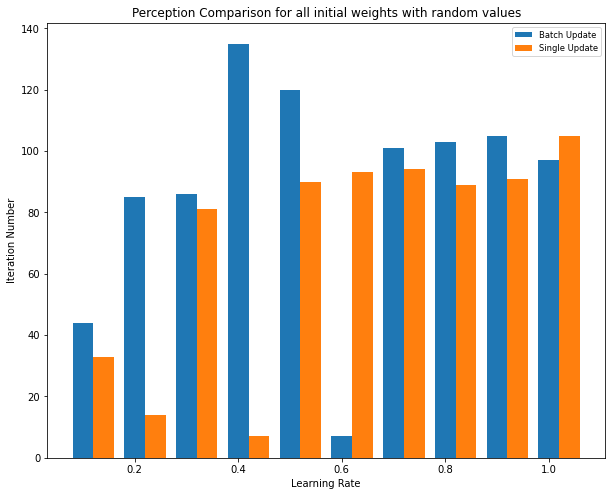

In [ ]:
plt.figure(2)
fig, ax = plt.subplots(1, figsize = (10, 8))

plt.bar(alpha, batch_rand_iter, 0.04, label='Batch Update')
plt.bar(alpha+0.04, single_rand_iter, 0.04, label='Single Update')

plt.title('Perception Comparison for all initial weights with random values')
plt.xlabel("Learning Rate")
plt.ylabel("Iteration Number")
plt.legend(loc="best",fontsize="small")

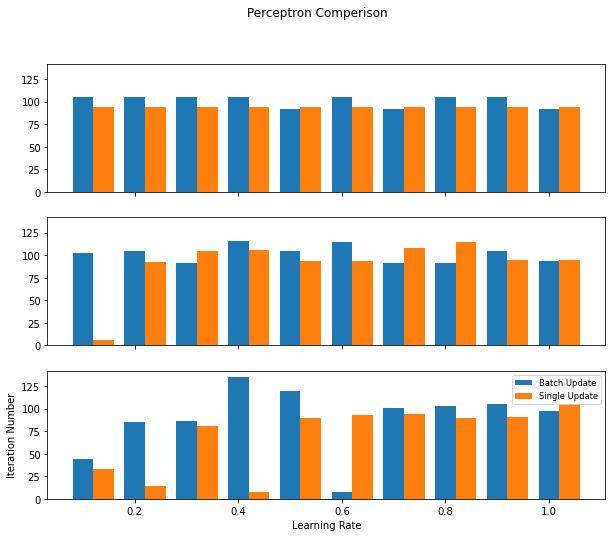

In [ ]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize = (10, 8))
fig.suptitle('Perceptron Comperison')


axs[0].bar(alpha, batch_0_iter, 0.04, label='Batch Update')
axs[0].bar(alpha+0.04, single_0_iter, 0.04, label='Single Update')


axs[1].bar(alpha, batch_1_iter, 0.04, label='Batch Update')
axs[1].bar(alpha+0.04, single_1_iter, 0.04, label='Single Update')

axs[2].bar(alpha, batch_rand_iter, 0.04, label='Batch Update')
axs[2].bar(alpha+0.04, single_rand_iter, 0.04, label='Single Update')


plt.xlabel("Learning Rate")
plt.ylabel("Iteration Number")
plt.legend(loc="best",fontsize="small")
